In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics import accuracy_score
import joblib


data = pd.read_csv('fake_or_real_news.csv')
data.columns = [col.strip().lower() for col in data.columns]

data['text_combined'] = data['title'] + ' ' + data['text']
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['text_combined'])

target=['label']
y = data[target].values.ravel()  # Or .values.flatten()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

print(predictions)

#joblib.dump(model,'news_realorfake.pkl') 
joblib.dump(vectorizer,'tfidvec.pkl')

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')

['FAKE' 'REAL' 'FAKE' ... 'REAL' 'REAL' 'FAKE']
Accuracy: 0.9250


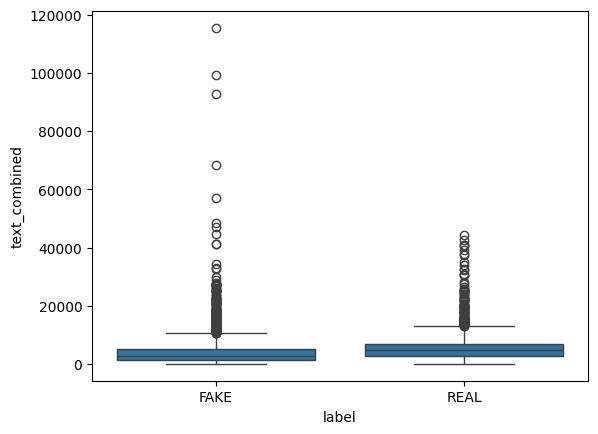

In [5]:

from collections import Counter
fake_words = ' '.join(data[data['label'] == 'FAKE']['text_combined']).split()
real_words = ' '.join(data[data['label'] == 'REAL']['text_combined']).split()


sns.boxplot(x='label', y=data['text_combined'].apply(len), data=data)
plt.show()



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Your custom blocked words
blocked_words = {'said', 'also', 'might', 'one', 'us'}

X = vectorizer.fit_transform(data['text_combined'])

X = vectorizer.fit_transform(data['text_combined'])

target=['label']
y = data[target].values.ravel()  # Or .values.flatten()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]
top_indices = np.argsort(coefs)[-10:]
print("Top positive influence words (fake):", feature_names[top_indices])

Top positive influence words (fake): ['islamic' 'conservative' 'fox' 'state' 'debate' 'candidates' 'gop' 'cruz'
 'sanders' 'said']


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_
top_indices = np.argsort(coefs)[-10:]
print("Top positive influence words (real):", feature_names[top_indices])


Top positive influence words (real): [['2016' 'hillary' 'october' ... 'cruz' 'sanders' 'said']]
